In [12]:
from __future__ import division
import os
import time
import math
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
import os

# Getting the current work directory (cwd)
thisdir = os.getcwd()
TrainingData= []
# r=root, d=directories, f = files
for r, d, f in os.walk('TrainingData'):
    for file in f:
        if ".mat" in file:
            print(os.path.join(r, file))
            TrainingData.append(os.path.join(r, file))

TrainingData\TrainSetPatch_1.mat
TrainingData\TrainSetPatch_10.mat
TrainingData\TrainSetPatch_11.mat
TrainingData\TrainSetPatch_12.mat
TrainingData\TrainSetPatch_13.mat
TrainingData\TrainSetPatch_14.mat
TrainingData\TrainSetPatch_15.mat
TrainingData\TrainSetPatch_16.mat
TrainingData\TrainSetPatch_17.mat
TrainingData\TrainSetPatch_18.mat
TrainingData\TrainSetPatch_19.mat
TrainingData\TrainSetPatch_2.mat
TrainingData\TrainSetPatch_20.mat
TrainingData\TrainSetPatch_3.mat
TrainingData\TrainSetPatch_4.mat
TrainingData\TrainSetPatch_5.mat
TrainingData\TrainSetPatch_6.mat
TrainingData\TrainSetPatch_7.mat
TrainingData\TrainSetPatch_8.mat
TrainingData\TrainSetPatch_9.mat


In [3]:
for i in range(0, len(TrainingData)):
    td = loadmat(TrainingData[i])['X']
    if (i==0):
        tdata = td
    else :
        tdata = np.concatenate((tdata, td), axis=1)
    
print(tdata.shape)
tdata = tdata.transpose()
print(len(tdata.transpose()[0]))



(64, 80000)
80000


In [4]:
# Deciding how many nodes wach layer should have

n_nodes_inpl = 64  #encoder
n_nodes_hl1  = 32  #encoder

n_nodes_hl2  = 32  #decoder
n_nodes_outl = 64  #decoder

In [5]:
# first hidden layer has 784*32 weights and 32 biases

hidden_1_layer_vals = {
'weights':tf.Variable(tf.random_normal([n_nodes_inpl,n_nodes_hl1])),
'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))  }
print(hidden_1_layer_vals)

# second hidden layer has 32*32 weights and 32 biases

hidden_2_layer_vals = {
'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))  }

# second hidden layer has 32*784 weights and 784 biases

output_layer_vals = {
'weights':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_outl])),
'biases':tf.Variable(tf.random_normal([n_nodes_outl])) }

{'weights': <tf.Variable 'Variable:0' shape=(64, 32) dtype=float32_ref>, 'biases': <tf.Variable 'Variable_1:0' shape=(32,) dtype=float32_ref>}


In [6]:
# image with shape 784 goes in
input_layer = tf.placeholder('float', [None, 64])

# multiply output of input_layer wth a weight matrix and add biases

layer_1 = tf.contrib.layers.fully_connected(tf.matmul(input_layer,hidden_1_layer_vals['weights']),
                                            32,
                                            activation_fn=tf.nn.relu)

# multiply output of layer_1 wth a weight matrix and add biases

layer_2 = tf.contrib.layers.fully_connected(
       tf.add(tf.matmul(layer_1,hidden_2_layer_vals['weights']),
       hidden_2_layer_vals['biases']),32, activation_fn=tf.nn.relu)

# multiply output of layer_2 wth a weight matrix and add biases

output_layer = tf.matmul(layer_1,output_layer_vals['weights']) 

# output_true shall have the original image for error calculations

output_true = tf.placeholder('float', [None, 64])

# define our cost function
meansq =    tf.reduce_mean(tf.square(output_layer - output_true))

# define our optimizer
learn_rate = 0.1   # how fast the model should learn
optimizer = tf.train.AdagradOptimizer(learn_rate).minimize(meansq)

In [7]:
# initialising stuff and starting the session

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# defining batch size, number of epochs and learning rate

batch_size = 50  # how many images to use together for training
hm_epochs =1000    # how many times to go through the entire dataset
tot_images =  len(tdata.transpose()[0])# total number of images

# running the model for a 1000 epochs taking 100 images in batches
# total improvement is printed out after each epoch

for epoch in range(hm_epochs):

    epoch_loss = 0    # initializing error as 0

    for i in range(int(tot_images/batch_size)):

        epoch_x = tdata[ i*batch_size : (i+1)*batch_size ]

        _, c = sess.run([optimizer, meansq],\
               feed_dict={input_layer: epoch_x, \
               output_true: epoch_x})

        epoch_loss += c

    print('Epoch', epoch, '/', hm_epochs, 'loss:',epoch_loss)

Epoch 0 / 1000 loss: 61.700785647146404
Epoch 1 / 1000 loss: 24.69725851994008
Epoch 2 / 1000 loss: 24.672554188407958
Epoch 3 / 1000 loss: 24.66496326494962
Epoch 4 / 1000 loss: 24.661571566015482
Epoch 5 / 1000 loss: 24.659794171340764
Epoch 6 / 1000 loss: 24.658714020624757
Epoch 7 / 1000 loss: 24.6580301951617
Epoch 8 / 1000 loss: 24.657547054812312
Epoch 9 / 1000 loss: 24.657211874611676
Epoch 10 / 1000 loss: 24.656986837275326
Epoch 11 / 1000 loss: 24.656809746287763
Epoch 12 / 1000 loss: 24.65669601224363
Epoch 13 / 1000 loss: 24.656585623510182
Epoch 14 / 1000 loss: 24.65650273859501
Epoch 15 / 1000 loss: 24.65642774477601
Epoch 16 / 1000 loss: 24.65637374855578
Epoch 17 / 1000 loss: 24.656322410330176
Epoch 18 / 1000 loss: 24.656277955509722
Epoch 19 / 1000 loss: 24.656234229914844
Epoch 20 / 1000 loss: 24.656203873455524
Epoch 21 / 1000 loss: 24.656176093034446
Epoch 22 / 1000 loss: 24.65615008957684
Epoch 23 / 1000 loss: 24.656124295666814
Epoch 24 / 1000 loss: 24.6561034657

Epoch 200 / 1000 loss: 24.65475073736161
Epoch 201 / 1000 loss: 24.654750087298453
Epoch 202 / 1000 loss: 24.654749092645943
Epoch 203 / 1000 loss: 24.65474841091782
Epoch 204 / 1000 loss: 24.65474750287831
Epoch 205 / 1000 loss: 24.65474688448012
Epoch 206 / 1000 loss: 24.65474610310048
Epoch 207 / 1000 loss: 24.654745498672128
Epoch 208 / 1000 loss: 24.65474470704794
Epoch 209 / 1000 loss: 24.654743854887784
Epoch 210 / 1000 loss: 24.654743026010692
Epoch 211 / 1000 loss: 24.6547425147146
Epoch 212 / 1000 loss: 24.654741696082056
Epoch 213 / 1000 loss: 24.654740885831416
Epoch 214 / 1000 loss: 24.654740364290774
Epoch 215 / 1000 loss: 24.654739636927843
Epoch 216 / 1000 loss: 24.65473893005401
Epoch 217 / 1000 loss: 24.65473836287856
Epoch 218 / 1000 loss: 24.654737622477114
Epoch 219 / 1000 loss: 24.6547369658947
Epoch 220 / 1000 loss: 24.654736298136413
Epoch 221 / 1000 loss: 24.654735763557255
Epoch 222 / 1000 loss: 24.65473503433168
Epoch 223 / 1000 loss: 24.65473440475762
Epoch 

Epoch 398 / 1000 loss: 24.65451316908002
Epoch 399 / 1000 loss: 24.654512784443796
Epoch 400 / 1000 loss: 24.654512311331928
Epoch 401 / 1000 loss: 24.654511763714254
Epoch 402 / 1000 loss: 24.65451129153371
Epoch 403 / 1000 loss: 24.65451095160097
Epoch 404 / 1000 loss: 24.654510468244553
Epoch 405 / 1000 loss: 24.65450998209417
Epoch 406 / 1000 loss: 24.654509593732655
Epoch 407 / 1000 loss: 24.654509216547012
Epoch 408 / 1000 loss: 24.65450866892934
Epoch 409 / 1000 loss: 24.654508166015148
Epoch 410 / 1000 loss: 24.65450779441744
Epoch 411 / 1000 loss: 24.654507357627153
Epoch 412 / 1000 loss: 24.65450695808977
Epoch 413 / 1000 loss: 24.65450639370829
Epoch 414 / 1000 loss: 24.654505958780646
Epoch 415 / 1000 loss: 24.654505622573197
Epoch 416 / 1000 loss: 24.65450516436249
Epoch 417 / 1000 loss: 24.6545046325773
Epoch 418 / 1000 loss: 24.654504249803722
Epoch 419 / 1000 loss: 24.654503886587918
Epoch 420 / 1000 loss: 24.654503386467695
Epoch 421 / 1000 loss: 24.654502949677408
Epo

Epoch 596 / 1000 loss: 24.654375828802586
Epoch 597 / 1000 loss: 24.654375219717622
Epoch 598 / 1000 loss: 24.65437437221408
Epoch 599 / 1000 loss: 24.65437411237508
Epoch 600 / 1000 loss: 24.654373257420957
Epoch 601 / 1000 loss: 24.654373046010733
Epoch 602 / 1000 loss: 24.654372463934124
Epoch 603 / 1000 loss: 24.65437174309045
Epoch 604 / 1000 loss: 24.654371435754
Epoch 605 / 1000 loss: 24.65437068976462
Epoch 606 / 1000 loss: 24.654370460659266
Epoch 607 / 1000 loss: 24.654369676485658
Epoch 608 / 1000 loss: 24.65436947531998
Epoch 609 / 1000 loss: 24.65436871536076
Epoch 610 / 1000 loss: 24.654368506744504
Epoch 611 / 1000 loss: 24.654367703944445
Epoch 612 / 1000 loss: 24.65436657052487
Epoch 613 / 1000 loss: 24.654365167953074
Epoch 614 / 1000 loss: 24.654364702291787
Epoch 615 / 1000 loss: 24.654363818466663
Epoch 616 / 1000 loss: 24.654363453388214
Epoch 617 / 1000 loss: 24.654362651519477
Epoch 618 / 1000 loss: 24.65436233021319
Epoch 619 / 1000 loss: 24.65436158888042
Epoc

Epoch 794 / 1000 loss: 24.65424111764878
Epoch 795 / 1000 loss: 24.65424075908959
Epoch 796 / 1000 loss: 24.654240272939205
Epoch 797 / 1000 loss: 24.654239911586046
Epoch 798 / 1000 loss: 24.65423938073218
Epoch 799 / 1000 loss: 24.65423903800547
Epoch 800 / 1000 loss: 24.65423865802586
Epoch 801 / 1000 loss: 24.654238206334412
Epoch 802 / 1000 loss: 24.654237613081932
Epoch 803 / 1000 loss: 24.654237190261483
Epoch 804 / 1000 loss: 24.65423672273755
Epoch 805 / 1000 loss: 24.654236365109682
Epoch 806 / 1000 loss: 24.654235860332847
Epoch 807 / 1000 loss: 24.654235370457172
Epoch 808 / 1000 loss: 24.654234948568046
Epoch 809 / 1000 loss: 24.654234568588436
Epoch 810 / 1000 loss: 24.654234209097922
Epoch 811 / 1000 loss: 24.654233663342893
Epoch 812 / 1000 loss: 24.65423321723938
Epoch 813 / 1000 loss: 24.654232871718705
Epoch 814 / 1000 loss: 24.65423240698874
Epoch 815 / 1000 loss: 24.65423193667084
Epoch 816 / 1000 loss: 24.654231623746455
Epoch 817 / 1000 loss: 24.654231016524136
E

Epoch 991 / 1000 loss: 24.647433352656662
Epoch 992 / 1000 loss: 24.64684474375099
Epoch 993 / 1000 loss: 24.646322699263692
Epoch 994 / 1000 loss: 24.645853233523667
Epoch 995 / 1000 loss: 24.645717927254736
Epoch 996 / 1000 loss: 24.64536587893963
Epoch 997 / 1000 loss: 24.644785035401583
Epoch 998 / 1000 loss: 24.644891389645636
Epoch 999 / 1000 loss: 24.644346735440195


(64,)
This is the weights of the hidden layer:
[[ 0.10239866  0.4470244   0.3706759  ... -0.46308723 -0.14580439
  -0.03778163]
 [-0.11594263  0.21886504 -0.41518387 ... -0.05295731 -0.5831738
   0.393596  ]
 [ 0.9509254   0.11576141  0.7386869  ... -1.1432886   0.97309065
   0.6085143 ]
 ...
 [-0.4978385  -0.25941956 -1.2866685  ...  0.39847556 -0.98149574
   0.49990568]
 [ 0.09814221  0.20810133  1.032067   ... -0.8694392   0.44546327
   0.92902774]
 [-1.2396507  -1.0283618   0.00473646 ...  0.21956551  0.63410616
   0.21212213]]
<tf.Variable 'Variable_4:0' shape=(32, 64) dtype=float32_ref>
This is the original image:


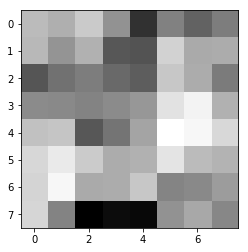

This is the reconsructed image after running through the auto encoder:


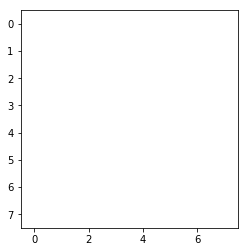

In [24]:
# pick any image

any_image = tdata[10]
print(any_image.shape)
# run it though the autoencoder

output_any_image = sess.run(output_layer,\
                   feed_dict={input_layer:[any_image]})

# run it though just the encoder

encoded_any_image = sess.run(layer_1,\
                   feed_dict={input_layer:[any_image]})

print("This is the weights of the hidden layer:")
print(sess.run(output_layer_vals['weights']))
print(output_layer_vals['weights'])
# print the original image
print("This is the original image:")
plt.imshow(np.reshape(any_image,(8,8)),  cmap='Greys')
plt.show()
print("This is the reconsructed image after running through the auto encoder:")
# print the encoding
plt.imshow(np.reshape(output_any_image,(8,8)),  cmap='Greys')
plt.show()